In [3]:
import Ultimate_logreg
from Ultimate_logreg import roc, desc_test, regularize, rsscost_graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from sklearn.naive_bayes import GaussianNB 
import xgboost as xgb 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC 
import sklearn
from multi_imbalance.resampling.mdo import MDO  
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve,recall_score,precision_score

In [7]:
dx = pd.read_csv('dx.csv')


<AxesSubplot:>

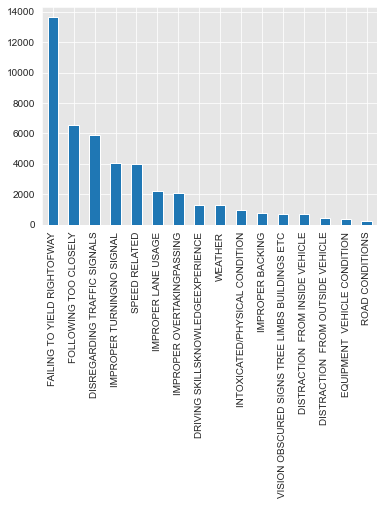

In [11]:
dx.dropna(subset=['INTERSECTION_RELATED_I'],  inplace = True)
dx.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')

In [66]:
CL =  ['VEHICLE_TYPE','DAMAGE','VEHICLE_USE',
        'ROAD_DEFECT','DEVICE_CONDITION',
       'DRIVER_VISION', 'DRIVER_ACTION',
       'ROADWAY_SURFACE_COND',
       'BAC_RESULT','PHYSICAL_CONDITION',
       
       'NUM_UNITS','LANE_CNT', 'OCCUPANT_CNT', 
       'AGE','TRAFFICWAY_TYPE','TRAFFIC_CONTROL_DEVICE',
        'FIRST_CRASH_TYPE','CRASH_TYPE','POSTED_SPEED_LIMIT']

Index(['Unnamed: 0', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'DEVICE_CONDITION', 'UNIT_NO', 'NUM_UNITS', 'CRASH_RECORD_ID',
       'HIT_AND_RUN_I', 'VEHICLE_USE', 'DRIVERS_LICENSE_CLASS',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DRIVER_VISION',
       'ROADWAY_SURFACE_COND', 'OCCUPANT_CNT', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'BAC_RESULT',
       'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'LATITUDE', 'LONGITUDE',
       'PRIM_CONTRIBUTORY_CAUSE', 'INJURIES_TOTAL', 'EXCEED_SPEED_LIMIT_I',
       'INJURIES_FATAL', 'MANEUVER', 'DRIVER_ACTION', 'TRAVEL_DIRECTION',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'STREET',
       'MOST_SEVERE_INJURY', 'CRASH_YEAR', 'ROAD_DEFECT', 'ALIGNMENT', 'AGE',
       'LANE_CNT', 'INTERSECTION_RELATED_I', 'CELL_PHONE_USE',
       'NOT_RIGHT_OF_WAY_I'],
      dtype='object')

In [12]:
dx.DEVICE_CONDITION.value_counts()

AttributeError: 'DataFrame' object has no attribute 'DEVICE_CONDITION'

In [ ]:
dx.

In [ ]:
dx.groupby

In [5]:
dx = pd.read_csv('dx.csv')

dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)

CL = ['PRIM_CONTRIBUTORY_CAUSE','DRIVER_ACTION',
      'FIRST_CRASH_TYPE','CRASH_HOUR',
                          'ROADWAY_SURFACE_COND',
      'MANEUVER','AGE','POSTED_SPEED_LIMIT']
d = dx[CL]


dm = d
b = d

dd=pd.get_dummies(dm, columns=['DRIVER_ACTION','FIRST_CRASH_TYPE',
                               'CRASH_HOUR',
                              'ROADWAY_SURFACE_COND',
                               'MANEUVER','AGE'], drop_first=True)

In [29]:
X = dd.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = dd[['PRIM_CONTRIBUTORY_CAUSE']] 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



## Logistic Regression ##
feature_selection=PCA()
clf=LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')

logreg = make_pipeline(feature_selection,clf)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)
cm = confusion_matrix(y_test, y_pred) 
print(cm)


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


62.88
[[ 27   0   0 ...   2   0   4]
 [  0   0   0 ...   0   0   0]
 [  0   0  60 ...   0   0   1]
 ...
 [  0   0   1 ...  60   2  27]
 [  0   0   1 ...   0  12  29]
 [  0   0   0 ...   3   1 667]]


In [23]:
## RANDOM FOREST ##

X = dd.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = dd[['PRIM_CONTRIBUTORY_CAUSE']] 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)


feature_selection=VarianceThreshold()
clf=RandomForestClassifier(n_estimators=250, random_state=42)

randomforest = make_pipeline(feature_selection,clf)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)


y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

cm = confusion_matrix(y_test, y_pred) 
print(cm)



C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  **fit_params : dict of string -> object


62.86
[[ 27   0   0 ...   0   0   4]
 [  0   0   0 ...   0   0   0]
 [  0   0  52 ...   0   0   1]
 ...
 [  0   0   1 ...   7   3  12]
 [  0   0   0 ...   0  16  21]
 [  0   0   1 ...   3   5 582]]


In [30]:
## SVM ##
feature_selection=PCA()
clf=SVC(kernel = 'rbf', C = 1, gamma ='scale')

svm = make_pipeline(feature_selection,clf)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


acc_svm = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svm)

cm = confusion_matrix(y_test, y_pred) 
print(cm)


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


62.81
[[ 27   0   0 ...   2   0   5]
 [  0   0   0 ...   0   0   0]
 [  0   0  52 ...   1   0   1]
 ...
 [  0   0   0 ...  65   3  28]
 [  0   0   1 ...   1   9  20]
 [  0   0   0 ...   1   1 594]]


In [89]:
## X Boosting ##

feature_selection=PCA()
clf= xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb = make_pipeline(feature_selection,clf)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_xgb)

cm = confusion_matrix(y_test, y_pred) 
print(cm)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


63.23
[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  1]
 [ 0  0  0 ...  0 18  4]
 [ 0  0  0 ...  0  2 56]]


In [31]:
## Gradient Boosting ##

feature_selection=PCA()
clf=GradientBoostingClassifier(random_state=42)

gbk = make_pipeline(feature_selection,clf)
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)

acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

cm = confusion_matrix(y_test, y_pred) 
print(cm)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


KeyboardInterrupt: 

In [93]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test,y_pred,data='Test')
print_metrics(y_test,y_pred)

ImportError: cannot import name 'plot_confusion_matrix'

In [13]:
# d = d[(d.VEHICLE_DEFECT != "NONE")]
# d = d[(d.TRAFFICWAY_TYPE != "NONE")]
# d = d[(d.DRIVER_VISION != "NONE")]
# d = d[(d.BAC_RESULT != "NONE")]
# d = d[(d.DRIVER_ACTION != "NONE")]
# d = d[(d.VEHICLE_TYPE != "NONE")]
# d = d[(d.TRAFFIC_CONTROL_DEVICE != "NONE")]
# d = d[(d.FIRST_CRASH_TYPE != "NONE")]
# d = d[(d.MANEUVER != "NONE")]
# d = d[(d.TRAFFIC_CONTROL_DEVICE != "NONE")]
# d = d[(d.ROAD_DEFECT != "NONE")]
# d = d[(d.ROADWAY_SURFACE_COND != "NONE")]

# d = d[(d.MANEUVER != "UNKNOWN/NA")]
# d = d[(d.MANEUVER != "OTHER")]
# d = d[(d.TRAFFICWAY_TYPE != "NOT REPORTED")]
# d = d[(d.TRAFFICWAY_TYPE != "OTHER")]
# d = d[(d.TRAFFICWAY_TYPE != "UNKNOWN")]
# d = d[(d.ROADWAY_SURFACE_COND != "OTHER")]
# d = d[(d.ROADWAY_SURFACE_COND != "UNKNOWN")]
# d = d[(d.DRIVER_VISION != "OTHER")]
# d = d[(d.DRIVER_VISION != "UNKNOWN")]


In [ ]:
xgb_pipeline = Pipeline([('ss',StandardScaler()),('xgb',xgb.XGBClassifier(objective='binary:logistic'))])

# Set grid search params
params = {
    "xgb__learning_rate": [0.001,0.05,0.01,0.1,0.5],
    'xgb__max_depth': [3,5,7],
    'xgb__subsample': [1],
    'xgb__n_estimators': [5, 50, 100, 250,500,750],
}

# Construct grid search
gs_rf = GridSearchCV(estimator=xgb_pipeline, 
                     param_grid=params, 
                     n_jobs=-1,
                            scoring=make_scorer(recall_score),cv=5)

# Fit using grid search
gs_rf.fit(X_train_smote, y_train_smote)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
import sklearn.metrics as sm
from mlxtend.plotting import plot_decision_regions





clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train.values, y_train.values) 

# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

ModuleNotFoundError: No module named 'mlxtend'

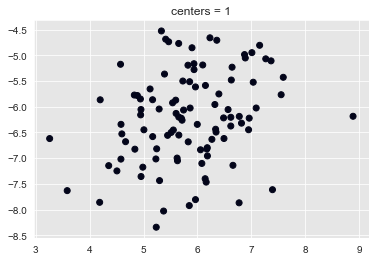

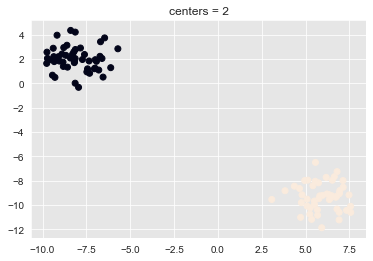

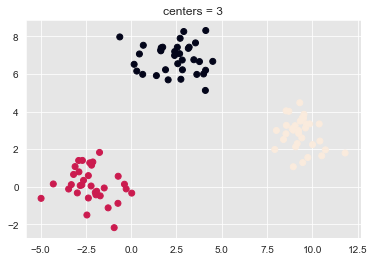

In [71]:
from sklearn.datasets.samples_generator import make_blobs


# plot 1
X, y = make_blobs(n_features=2, centers=1)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('centers_1.png')
plt.title('centers = 1')

# plot 2    
X, y = make_blobs(n_features=2, centers=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

# plot 3
X, y = make_blobs(n_features=2, centers=3)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')

plt.show()

In [78]:

smote = SMOTE()
X_train_smote , y_train_smote = smote.fit_sample(X_train,y_train)  

y_train_smote_counter = Counter(y_train_smote)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [ ]:
# Calculate the probability scores of each point in the training set
y_train_score = logreg_best.decision_function(X_train_smote)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_smote, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score =logreg_best.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

In [ ]:

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()